In [25]:
# importing essential libraries

import numpy as np 
# For visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Processing and loading data
import tensorflow
from tensorflow import keras
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# CNN Modellinig
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation
# Activation functions
from tensorflow.keras.activations import relu,softmax
# Optimizers
from tensorflow.keras.optimizers import Adam
# reading image
from tensorflow.keras.preprocessing import image

In [2]:
# Path for the train images and test images

train_path = './tomato/train/'
test_path = './tomato/val/'
valid_path = './tomato/valid/'

In [3]:
# ALl the size of the image should be same, assign the height and width of the image

img_height,img_width = 256,256

In [4]:
# Data Augmentation

train_gen = ImageDataGenerator(rescale = 1./255,rotation_range=0,
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                horizontal_flip=True,
                                vertical_flip=True,zoom_range=0.2)

# In test data we just do the scaling as this is going to be unseen data

test_gen = ImageDataGenerator(rescale = 1./255)

valid_gen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Reading the images and appllying data augmentation on them from the folder

train = train_gen.flow_from_directory(train_path,
                                    target_size = (img_height,img_width),
                                    class_mode='categorical',
                                    batch_size=32)

test = test_gen.flow_from_directory(test_path,
                                   target_size = (img_height,img_width),
                                    class_mode='categorical',
                                    batch_size=32)

valid = valid_gen.flow_from_directory(valid_path,
                                   target_size = (img_height,img_width),
                                    class_mode='categorical',
                                    batch_size=32)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Found 160 images belonging to 10 classes.


In [6]:
# Printing the classes present in the folder and there labels

train_dict = train.class_indices
[print(key ,' : ',value)for key,value in train_dict.items()]

Bacterial_spot  :  0
Early_blight  :  1
Late_blight  :  2
Leaf_Mold  :  3
Septoria_leaf_spot  :  4
Spider_mites Two-spotted_spider_mite  :  5
Target_Spot  :  6
Yellow_Leaf_Curl_Virus  :  7
healthy  :  8
mosaic_virus  :  9


[None, None, None, None, None, None, None, None, None, None]

In [7]:
test.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Yellow_Leaf_Curl_Virus': 7,
 'healthy': 8,
 'mosaic_virus': 9}

In [8]:
# Developing the model. Customized CNN

model = Sequential()

# Hidden Layer 1 
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
# Maxpooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layer 1 
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# Maxpooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layer 1 
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
# Maxpooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer 
model.add(Flatten())
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(len(train.class_indices),activation='softmax'))



In [9]:
# Compiling the model

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])


In [10]:
# Fitting the model
    
model.fit(train,epochs = 30,batch_size = 16,verbose=1)

Epoch 1/30
313/313 [==============================] - 2271s 7s/step - loss: 2.1026 - accuracy: 0.2186
Epoch 2/30
313/313 [==============================] - 1755s 6s/step - loss: 1.5280 - accuracy: 0.4450
Epoch 3/30
313/313 [==============================] - 1734s 6s/step - loss: 1.0256 - accuracy: 0.6386
Epoch 4/30
313/313 [==============================] - 1664s 5s/step - loss: 0.8529 - accuracy: 0.7004
Epoch 5/30
313/313 [==============================] - 1646s 5s/step - loss: 0.6809 - accuracy: 0.7631
Epoch 6/30
313/313 [==============================] - 1647s 5s/step - loss: 0.6442 - accuracy: 0.7734
Epoch 7/30
313/313 [==============================] - 1688s 5s/step - loss: 0.5896 - accuracy: 0.7912
Epoch 8/30
313/313 [==============================] - 1446s 5s/step - loss: 0.4982 - accuracy: 0.8259
Epoch 9/30
313/313 [==============================] - 1635s 5s/step - loss: 0.4966 - accuracy: 0.8247
Epoch 10/30
313/313 [==============================] - 1503s 5s/step - loss: 0.443

In [11]:
# My system took about 22 hours for completing these 30 epochs
# If we do 50 epochs we will get better accuracy and less loss

In [12]:
train_loss = model.history.history['loss']
train_acc = model.history.history['accuracy']


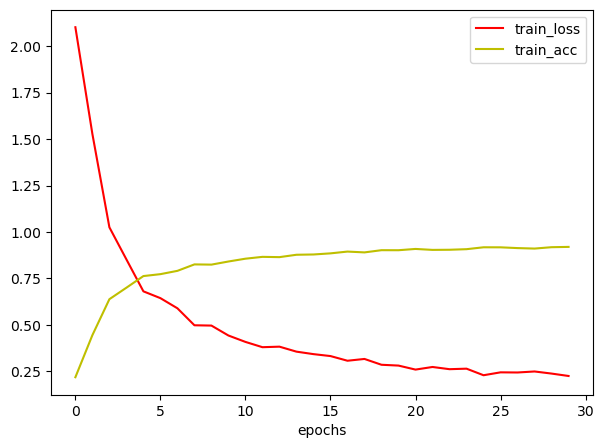

In [15]:
plt.figure(figsize=(7,5))
plt.plot(np.arange(30),train_loss,color='r',label='train_loss')

plt.plot(np.arange(30),train_acc,color='y',label='train_acc')

plt.legend()
plt.xlabel('epochs')
plt.show()

In [ ]:
print(loss)
print(acc)

In [24]:
train.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Yellow_Leaf_Curl_Virus': 7,
 'healthy': 8,
 'mosaic_virus': 9}

In [50]:
labels = train.class_indices

def fun(path):
    a = plt.imread(path)
    plt.imshow(a)
    
    image_pred = image.load_img(path,target_size=(img_height,img_width))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis=0)
    result = model.predict(a)
    predicted_labels = result > 0.5
    print('prediction class : ',result)
    for i, label in enumerate(labels):
        if predicted_labels[0][i]:
            print(label)
    
   
    

1/1 [==============================] - 0s 63ms/step
prediction class :  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Septoria_leaf_spot


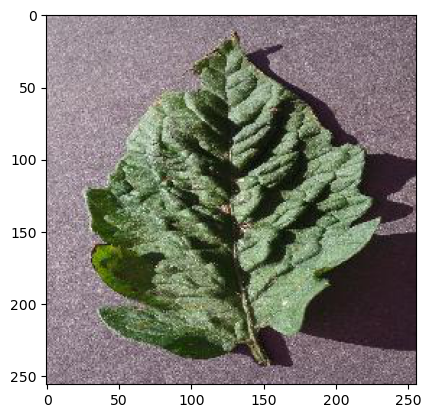

In [57]:
fun('C:/Users/piyus/Desktop/Ekeeda/Algo Pract/Tomato Leaf disease Classification CNN/tomato/val/Target_Spot/Tomato___Target_Spot_original_0c2bd887-092f-410d-ac56-9b96110665c8___Com.G_TgS_FL 8285.JPG_83359536-4611-4233-a4d4-5af13aaa8cb7.JPG')